# Average House Sale Prices forecast in Connecticut

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [26]:
#importing libraries

In [27]:
import pandas as pd
from prophet import Prophet

In [28]:
#ignoring the warnings occured during fitting the model

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
#Reading the data frame

In [31]:
data_frame=pd.read_csv('Connecticut.csv')

In [32]:
county_name=data_frame['County'].value_counts().index[0]

In [33]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,214451.78,342552.42,Connecticut
1,2001-02-01,214451.78,349346.53,Connecticut
2,2001-03-01,217493.65,337250.78,Connecticut
3,2001-04-01,220535.52,337112.25,Connecticut
4,2001-05-01,228140.19,334997.97,Connecticut


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [34]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [35]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,214451.78,342552.42
1,2001-02-01,214451.78,349346.53
2,2001-03-01,217493.65,337250.78
3,2001-04-01,220535.52,337112.25
4,2001-05-01,228140.19,334997.97


Extracting only Median Sale Price as a dataframe by removing Median Sale Price feature

In [36]:
average_data=data_frame.drop(['Median Sale Price'],axis=1)

## Forecasting average_data

In [37]:
average_data.head()

,Date,Average Sale Price
0,2001-01-01,342552.42
1,2001-02-01,349346.53
2,2001-03-01,337250.78
3,2001-04-01,337112.25
4,2001-05-01,334997.97


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [38]:
average_data.columns=['ds','y']

In [39]:
average_data

,ds,y
0,2001-01-01,342552.42
1,2001-02-01,349346.53
2,2001-03-01,337250.78
3,2001-04-01,337112.25
4,2001-05-01,334997.97
...,...,...
245,2021-06-01,467990.01
246,2021-07-01,477072.25
247,2021-08-01,456800.41
248,2021-09-01,401529.19


In [40]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(average_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [42]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,470443.222201,436961.038554,501777.025549
270,2023-06-30,469929.551631,436860.444458,500926.612961
271,2023-07-31,460067.596553,425368.989488,494383.977641
272,2023-08-31,428340.325643,396634.783090,462222.463446
273,2023-09-30,419394.160691,387512.121201,453236.362170


Calling the forecast dataframe which contains the predicted values along with the actual values

In [43]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,333503.747720,279826.264670,341950.309796,333503.747720,333503.747720,-23634.632512,-23634.632512,-23634.632512,-23634.632512,-23634.632512,-23634.632512,0.0,0.0,0.0,309869.115208
1,2001-02-01,336091.070115,282043.955790,344873.339702,336091.070115,336091.070115,-22032.448230,-22032.448230,-22032.448230,-22032.448230,-22032.448230,-22032.448230,0.0,0.0,0.0,314058.621885
2,2001-03-01,338428.006471,283105.977998,346153.163941,338428.006471,338428.006471,-25130.628255,-25130.628255,-25130.628255,-25130.628255,-25130.628255,-25130.628255,0.0,0.0,0.0,313297.378216
3,2001-04-01,341015.328866,298881.740190,363805.829891,341015.328866,341015.328866,-8906.502082,-8906.502082,-8906.502082,-8906.502082,-8906.502082,-8906.502082,0.0,0.0,0.0,332108.826784
4,2001-05-01,343519.189248,321405.017374,383637.402193,343519.189248,343519.189248,8363.683715,8363.683715,8363.683715,8363.683715,8363.683715,8363.683715,0.0,0.0,0.0,351882.872963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,428374.454050,436961.038554,501777.025549,421527.319041,436180.174998,42068.768151,42068.768151,42068.768151,42068.768151,42068.768151,42068.768151,0.0,0.0,0.0,470443.222201
270,2023-06-30,429762.441067,436860.444458,500926.612961,422254.937955,438231.326419,40167.110564,40167.110564,40167.110564,40167.110564,40167.110564,40167.110564,0.0,0.0,0.0,469929.551631
271,2023-07-31,431196.694318,425368.989488,494383.977641,423084.471155,440439.723244,28870.902235,28870.902235,28870.902235,28870.902235,28870.902235,28870.902235,0.0,0.0,0.0,460067.596553
272,2023-08-31,432630.947569,396634.783090,462222.463446,423619.793376,442547.006863,-4290.621926,-4290.621926,-4290.621926,-4290.621926,-4290.621926,-4290.621926,0.0,0.0,0.0,428340.325643


## Plotting the forecast data

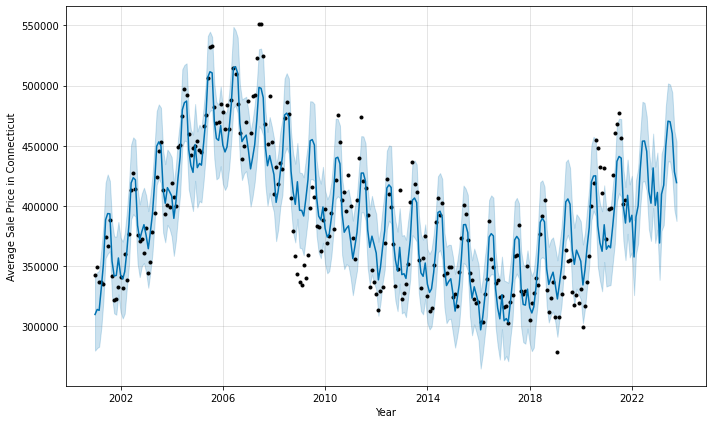

In [44]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

## Plotting components of forecast data

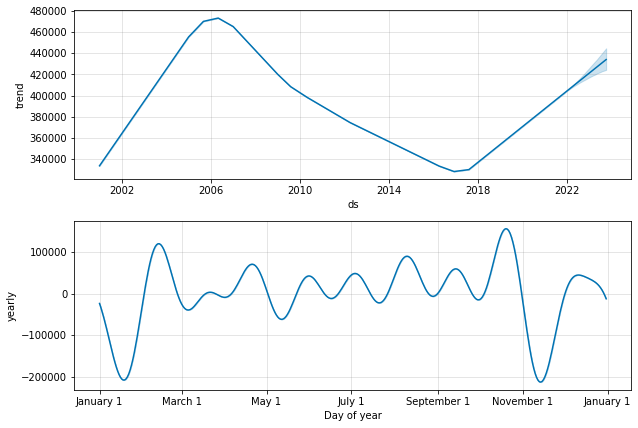

In [45]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [46]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [47]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [48]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics(module used to supervise the model)

In [49]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,1.557138e+09,39460.585422,30411.695303,0.074797,0.055316,0.077303,0.431818
1,40 days,1.471443e+09,38359.396376,28884.638873,0.070827,0.055316,0.072884,0.454545
2,42 days,1.452792e+09,38115.509857,28449.274094,0.069907,0.050298,0.071888,0.477273
3,44 days,1.459883e+09,38208.412349,29114.500816,0.072218,0.055316,0.073747,0.443182
4,45 days,1.507626e+09,38828.155573,30271.367829,0.075014,0.060124,0.076329,0.409091


In [50]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.92520262479108%
Horizon: 40 days 00:00:00, Accuracy: 99.92917275863873%
Horizon: 42 days 00:00:00, Accuracy: 99.93009320784165%
Horizon: 44 days 00:00:00, Accuracy: 99.92778240726842%
Horizon: 45 days 00:00:00, Accuracy: 99.92498625292677%
Horizon: 46 days 00:00:00, Accuracy: 99.92613137246403%
Horizon: 47 days 00:00:00, Accuracy: 99.92693159029838%
Horizon: 49 days 00:00:00, Accuracy: 99.92666679626471%
Horizon: 50 days 00:00:00, Accuracy: 99.92856454283319%
Horizon: 51 days 00:00:00, Accuracy: 99.92950077966943%
Horizon: 52 days 00:00:00, Accuracy: 99.93013840559362%
Horizon: 54 days 00:00:00, Accuracy: 99.92923109594005%
Horizon: 55 days 00:00:00, Accuracy: 99.93114105417466%
Horizon: 56 days 00:00:00, Accuracy: 99.9308498976033%
Horizon: 58 days 00:00:00, Accuracy: 99.93024642565446%
Horizon: 60 days 00:00:00, Accuracy: 99.93105620442212%
Horizon: 61 days 00:00:00, Accuracy: 99.92820153611642%
Horizon: 62 days 00:00:00, Accuracy: 99.927546254

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

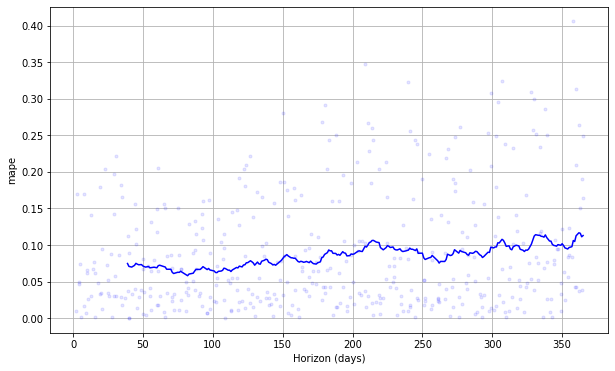

In [51]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 80-90.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [54]:
import pickle

In [53]:
with open(county_name+'_prophet_model_for_average_sale_price.pkl','wb') as file:
    pickle.dump(m,file)